# Multivariate with Prophet


<img src="https://frenzy86.s3.eu-west-2.amazonaws.com/python/multi.png" width="1600">


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.express as px

In [2]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv

--2023-02-21 17:36:58--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/nyc_energy_consumption.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.144.2
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.144.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1867062 (1.8M) [text/csv]
Saving to: ‘nyc_energy_consumption.csv’

nyc_energy_consumpt 100%[===================>]   1.78M  3.08MB/s    in 0.6s    

2023-02-21 17:36:59 (3.08 MB/s) - ‘nyc_energy_consumption.csv’ saved [1867062/1867062]



In [3]:
df = pd.read_csv('nyc_energy_consumption.csv')
df['timeStamp']= pd.to_datetime(df['timeStamp'])
df

timeStamp  demand  precip   temp
0     2012-01-01 00:00:00  4937.5  0.0000  46.13
1     2012-01-01 01:00:00  4752.1  0.0000  45.89
2     2012-01-01 02:00:00  4542.6  0.0000  45.04
3     2012-01-01 03:00:00  4357.7  0.0000  45.03
4     2012-01-01 04:00:00  4275.5  0.0000  42.61
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[49205 rows x 4 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


In [5]:
def printStats(dataframe):
  print("Rows     :", dataframe.shape[0])
  print("Columns  :", dataframe.shape[1])
  print("\n Features \n", dataframe.columns.to_list())
  print("\n Missing Values \n", dataframe.isnull().any())
  print("\n Unique Values \n", dataframe.nunique())

In [6]:
printStats(df)

Rows     : 49205
Columns  : 4

 Features 
 ['timeStamp', 'demand', 'precip', 'temp']

 Missing Values 
 timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

 Unique Values 
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [7]:
fig = px.line(df, x = 'timeStamp',y = 'demand',title = 'NYC_Energy_Consumption')

fig.update_traces(line_color='#000080', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [8]:
fig = px.line(df, x = 'timeStamp',y = 'temp',title = 'NYC_Temperature')

fig.update_traces(line_color='#00FF00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [9]:
fig = px.line(df, x = 'timeStamp',y = 'precip',title = 'NYC_Precipitation')

fig.update_traces(line_color='#ff8c00', line_width=1)

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [10]:
df.head()

timeStamp  demand  precip   temp
0 2012-01-01 00:00:00  4937.5     0.0  46.13
1 2012-01-01 01:00:00  4752.1     0.0  45.89
2 2012-01-01 02:00:00  4542.6     0.0  45.04
3 2012-01-01 03:00:00  4357.7     0.0  45.03
4 2012-01-01 04:00:00  4275.5     0.0  42.61

In [11]:
ny_df =df.set_index('timeStamp')

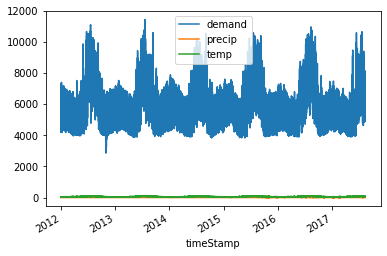

In [12]:
ny_df.plot();

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1e14019970>,
      dtype=object)

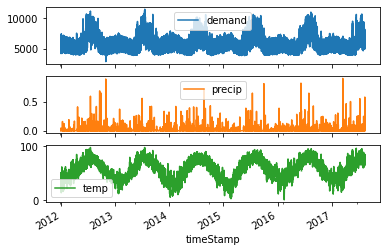

In [13]:
ny_df.plot(subplots = True)

## Resample by Day --> Mean

In [32]:
# a = ny_df['demand'].resample('D').sum()
# b = ny_df['temp'].resample('D').mean()
# c = ny_df['precip'].resample('D').sum()

ny_df_daily = ny_df.resample('D').mean()
# ny_df_daily['demand'] = a
# ny_df_daily['demand'] = c
ny_df_daily

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.002033  75.217500
2017-08-11          NaN  0.000000  72.767917
2017-08-12          NaN  0.000443  69.771429

[2051 rows x 3 columns]

In [33]:
ny_df_daily['demand']= ny_df_daily['demand'].fillna(method = 'ffill')
ny_df_daily['temp']= ny_df_daily['temp'].fillna(method = 'ffill')
ny_df_daily['precip']= ny_df_daily['precip'].fillna(method = 'ffill')

ny_df_final = ny_df_daily.reset_index()[['timeStamp','demand','temp']].rename({'timeStamp':'ds','demand':'y','temp':'temp'}, axis='columns')
ny_df_final

ds            y       temp
0    2012-01-01  4954.833333  46.510000
1    2012-01-02  5302.954167  40.496667
2    2012-01-03  6095.512500  26.672500
3    2012-01-04  6336.266667  20.585000
4    2012-01-05  6130.245833  33.577500
...         ...          ...        ...
2046 2017-08-08  6471.626042  71.039167
2047 2017-08-09  6811.112167  73.852500
2048 2017-08-10  5582.297000  75.217500
2049 2017-08-11  5582.297000  72.767917
2050 2017-08-12  5582.297000  69.771429

[2051 rows x 3 columns]

In [34]:
ny_df_final['month']= ny_df_final['ds'].dt.month
ny_df_final

ds            y       temp  month
0    2012-01-01  4954.833333  46.510000      1
1    2012-01-02  5302.954167  40.496667      1
2    2012-01-03  6095.512500  26.672500      1
3    2012-01-04  6336.266667  20.585000      1
4    2012-01-05  6130.245833  33.577500      1
...         ...          ...        ...    ...
2046 2017-08-08  6471.626042  71.039167      8
2047 2017-08-09  6811.112167  73.852500      8
2048 2017-08-10  5582.297000  75.217500      8
2049 2017-08-11  5582.297000  72.767917      8
2050 2017-08-12  5582.297000  69.771429      8

[2051 rows x 4 columns]

In [35]:
fig = px.line(ny_df_final, x = 'ds',y = 'y',title = 'NYC_Energy_Consumption Daily', hover_data=['temp','month'])

fig.update_xaxes(
    rangeslider_visible= True,
    rangeselector=dict(
                        buttons = list([
                        dict(count = 1,label = '1m',step='month',stepmode = "backward"),
                        dict(count = 2,label = '6m',step='month',stepmode = "backward"),
                        dict(count = 3,label = '6mYTD',step='month',stepmode = "todate"),
                        dict(count = 4,label = '2y',step='year',stepmode = "backward"),
                        dict(count = 5,label = '3y',step='year',stepmode = "backward"),
                        dict(step= 'all')
                            ])        
                        )
                   )
fig.show()

In [36]:
## Groupby with min max mean values
ny_df_final[['month','temp']].groupby('month').agg({'temp':{'max','min','mean'}})

temp                      
            mean        min        max
month                                 
1      33.432140   9.507917  55.420455
2      34.517758   9.015000  59.360000
3      41.419884  20.291667  67.878333
4      52.600204  33.045833  72.992083
5      62.543994  48.090833  82.576250
6      71.334418  52.405833  86.916667
7      77.595627  66.417083  89.606667
8      75.525947  68.042083  87.426250
9      69.550306  57.274583  84.448750
10     58.642895  42.106250  74.277500
11     47.225638  27.172500  67.606250
12     41.520068  22.429583  64.735000

In [37]:
ny_df_final[['y','temp']].corr()

y      temp
y     1.000000  0.560138
temp  0.560138  1.000000

In [38]:
ny_df_final.query('temp>80')[['y','temp']].corr()

y      temp
y     1.000000  0.552918
temp  0.552918  1.000000

In [39]:
ny_df_final.query('temp<=80')[['y','temp']].corr()

y      temp
y     1.000000  0.469771
temp  0.469771  1.000000

In [40]:
def summer_temp(temp):
  if temp>80:
    return 1
  else:
    return 0

In [42]:
ny_df_final['summer_temp'] = ny_df_final['temp'].apply(summer_temp)
ny_df_final['month_bins'] = pd.cut(ny_df_final['month'],bins=3,labels=False)
ny_df_final

ds            y       temp  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000      1            0           0
1    2012-01-02  5302.954167  40.496667      1            0           0
2    2012-01-03  6095.512500  26.672500      1            0           0
3    2012-01-04  6336.266667  20.585000      1            0           0
4    2012-01-05  6130.245833  33.577500      1            0           0
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[2051 rows x 6 columns]

In [43]:
train = ny_df_final[(ny_df_final['ds']>='2012-01-01') & (ny_df_final['ds']<='2017-04-30')]
test = ny_df_final[(ny_df_final['ds']>'2017-04-30')]

print(train.shape)
print(test.shape)

(1947, 6)
(104, 6)


In [44]:
test

ds            y       temp  month  summer_temp  month_bins
1947 2017-05-01  5417.231583  60.300833      5            0           1
1948 2017-05-02  5697.950042  67.537917      5            0           1
1949 2017-05-03  5354.628500  59.413333      5            0           1
1950 2017-05-04  5235.704833  54.877083      5            0           1
1951 2017-05-05  5358.639500  55.720833      5            0           1
...         ...          ...        ...    ...          ...         ...
2046 2017-08-08  6471.626042  71.039167      8            0           1
2047 2017-08-09  6811.112167  73.852500      8            0           1
2048 2017-08-10  5582.297000  75.217500      8            0           1
2049 2017-08-11  5582.297000  72.767917      8            0           1
2050 2017-08-12  5582.297000  69.771429      8            0           1

[104 rows x 6 columns]

## Prophet simple

In [67]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True
                )

# add regressor
#model.add_regressor('summer_temp',standardize=False)
#model.add_regressor('month_bins',standardize=False,mode='multiplicative')

model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/guah80be.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/v00f98xx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15543', 'data', 'file=/tmp/tmph8pw10i8/guah80be.json', 'init=/tmp/tmph8pw10i8/v00f98xx.json', 'output', 'file=/tmp/tmph8pw10i8/prophet_modelgz7ozh6p/prophet_model-20230221182158.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [68]:
future = model.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [69]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7595.430554  6678.743332  8493.046008
2047 2017-08-09  7584.564328  6714.007658  8468.436537
2048 2017-08-10  7539.300012  6658.907511  8443.182756
2049 2017-08-11  7494.535416  6548.850370  8426.539118
2050 2017-08-12  6919.723481  5974.262343  7842.827724

In [70]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="Energy Demand",
                  xaxis_title="Data",
                  title="NYC Energy Demand",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

In [71]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_results = cross_validation(model = model,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/nbehvgq6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/g29dmq6o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52123', 'data', 'file=/tmp/tmph8pw10i8/nbehvgq6.json', 'init=/tmp/tmph8pw10i8/g29dmq6o.json', 'output', 'file=/tmp/tmph8pw10i8/prophet_model445kuxiq/prophet_model-20230221182206.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:22:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:22:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/3d6do0s8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/xyw1pc3n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  252845.303513  502.837254  407.484654  0.073249   
1    37 days 00:00:00  259563.824792  509.474067  414.853663  0.074531   
2    37 days 12:00:00  261906.903684  511.768408  418.269998  0.075120   
3    38 days 00:00:00  264685.735762  514.476176  421.366125  0.075382   
4    38 days 12:00:00  268421.434232  518.094040  426.626848  0.076223   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  259098.543751  509.017233  446.792489  0.082462   
654 363 days 12:00:00  260919.958810  510.803249  447.943930  0.082667   
655 364 days 00:00:00  265294.381560  515.067356  451.511762  0.083509   
656 364 days 12:00:00  265455.121456  515.223370  451.291455  0.083506   
657 365 days 00:00:00  261086.408000  510.966152  448.174360  0.083360   

        mdape     smape  coverage  
0    0.065546  0.072278  0.879121  
1    0.066277  0.073476  0.873626  
2    0.067515  0.074093  0.873626  
3    0.068467  0.074330  0.873626  
4    0.068773  0.075198  0.873626  
..        ...       ...       ...  
653  0.082627  0.081606  0.983516  
654  0.083414  0.081906  0.978022  
655  0.084946  0.082753  0.978022  
656  0.084946  0.082835  0.978022  
657  0.085301  0.082580  0.978022  

[658 rows x 8 columns]

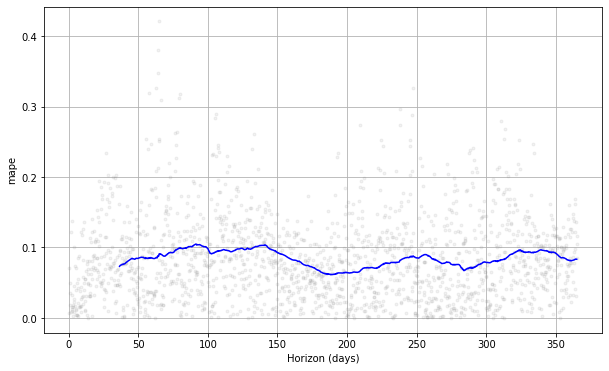

In [72]:
from prophet.plot import plot_cross_validation_metric

fig3 = plot_cross_validation_metric(cv_results,metric='mape')

## Multivariate as Multiple-Regressor

In [58]:
from prophet import Prophet

model = Prophet(interval_width=0.95,
                yearly_seasonality=True
                )

# add regressor
model.add_regressor('summer_temp',standardize=False)
model.add_regressor('month_bins',standardize=False,mode='multiplicative')

model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/4fk1ojkl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/56772s6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37769', 'data', 'file=/tmp/tmph8pw10i8/4fk1ojkl.json', 'init=/tmp/tmph8pw10i8/56772s6x.json', 'output', 'file=/tmp/tmph8pw10i8/prophet_model6nw9amcm/prophet_model-20230221182043.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:20:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:20:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [59]:
model.params

OrderedDict([('lp__', array([[5340.12]])),
             ('k', array([[0.162932]])),
             ('m', array([[0.588011]])),
             ('delta',
              array([[-7.77904e-08, -1.09243e-03, -2.02140e-01, -2.32348e-08,
                      -8.37727e-08,  1.23223e-02,  1.16328e-02,  9.40565e-03,
                       1.35367e-03,  2.05016e-08,  3.40767e-07, -5.55275e-02,
                      -2.35714e-07,  7.70930e-08,  1.55860e-01,  1.46828e-07,
                      -2.20277e-07, -1.02506e-01, -4.32700e-02, -1.28267e-07,
                      -9.44383e-09, -9.75008e-08,  3.65785e-02,  2.62860e-02,
                       3.04505e-08]])),
             ('sigma_obs', array([[0.038781]])),
             ('beta',
              array([[-0.0356543 , -0.0591281 ,  0.049373  ,  0.0401483 , -0.0094908 ,
                      -0.00176262, -0.00782968, -0.00252721,  0.00339328, -0.0058574 ,
                       0.0014147 ,  0.00306482, -0.0052757 , -0.00380534,  0.00335172,
            

In [60]:
future = model.make_future_dataframe(periods=104)
future.tail()

ds
2046 2017-08-08
2047 2017-08-09
2048 2017-08-10
2049 2017-08-11
2050 2017-08-12

In [61]:
future['summer_temp']=ny_df_final['summer_temp']
future['month_bins']=ny_df_final['month_bins']
future

ds  summer_temp  month_bins
0    2012-01-01            0           0
1    2012-01-02            0           0
2    2012-01-03            0           0
3    2012-01-04            0           0
4    2012-01-05            0           0
...         ...          ...         ...
2046 2017-08-08            0           1
2047 2017-08-09            0           1
2048 2017-08-10            0           1
2049 2017-08-11            0           1
2050 2017-08-12            0           1

[2051 rows x 3 columns]

In [62]:
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
2046 2017-08-08  7380.489833  6659.202229  8188.316506
2047 2017-08-09  7391.215954  6587.717334  8153.619949
2048 2017-08-10  7361.460015  6600.270129  8144.203200
2049 2017-08-11  7311.194020  6567.299411  8061.764448
2050 2017-08-12  6730.291132  5900.293498  7527.548662

In [63]:
######################### Dynamic PLOT ###############################
from prophet.plot import plot_plotly
from datetime import datetime

fig = plot_plotly(model, forecast)
fig.update_layout( 
                  yaxis_title="Energy Demand",
                  xaxis_title="Data",
                  title="NYC Energy Demand",
                  )
#################### vertical line ############
#fig.add_vline(x=datetime.today(), line_width=3, line_dash="dash", line_color="red")
##############################################
#st.plotly_chart(fig)

fig

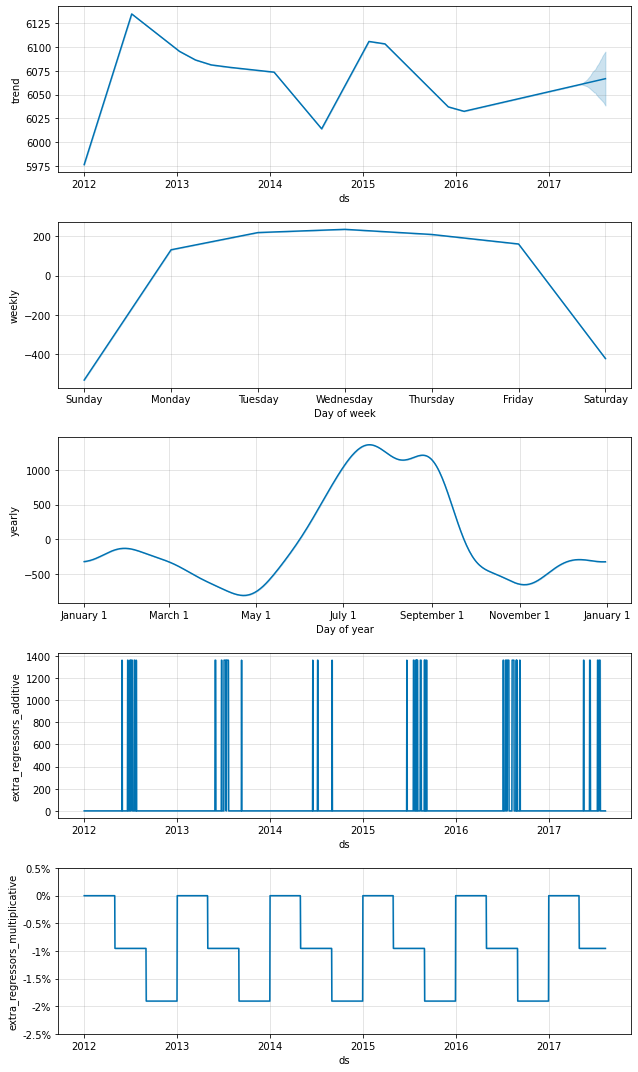

In [64]:
fig2 = model.plot_components(forecast)

In [65]:
from prophet.diagnostics import cross_validation,performance_metrics

cv_results = cross_validation(model = model,initial = '731 days',horizon='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:prophet:Making 5 forecasts with cutoffs between 2014-05-01 00:00:00 and 2016-04-30 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/pwz95_4v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/rpv1jrs5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37384', 'data', 'file=/tmp/tmph8pw10i8/pwz95_4v.json', 'init=/tmp/tmph8pw10i8/rpv1jrs5.json', 'output', 'file=/tmp/tmph8pw10i8/prophet_modelek00mqlt/prophet_model-20230221182105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/wsjy33oy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph8pw10i8/qjwfssxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

horizon            mse        rmse         mae      mape  \
0    36 days 12:00:00  201797.053023  449.218269  349.664549  0.061988   
1    37 days 00:00:00  207880.518831  455.939161  356.519702  0.063142   
2    37 days 12:00:00  209141.393589  457.319794  358.860005  0.063536   
3    38 days 00:00:00  213286.259334  461.829253  363.019301  0.063964   
4    38 days 12:00:00  215511.815209  464.232501  366.895160  0.064579   
..                ...            ...         ...         ...       ...   
653 363 days 00:00:00  151143.015625  388.771161  325.610044  0.059556   
654 363 days 12:00:00  151701.111874  389.488269  325.651094  0.059561   
655 364 days 00:00:00  154490.302473  393.052544  328.051382  0.060209   
656 364 days 12:00:00  154069.999487  392.517515  327.130999  0.060062   
657 365 days 00:00:00  148169.435309  384.927831  322.619185  0.059653   

        mdape     smape  coverage  
0    0.052044  0.061834  0.906593  
1    0.052102  0.062952  0.895604  
2    0.053165  0.063361  0.895604  
3    0.054228  0.063800  0.890110  
4    0.054378  0.064434  0.890110  
..        ...       ...       ...  
653  0.058922  0.059597  0.978022  
654  0.058922  0.059652  0.978022  
655  0.059761  0.060325  0.972527  
656  0.059363  0.060217  0.972527  
657  0.059363  0.059726  0.978022  

[658 rows x 8 columns]

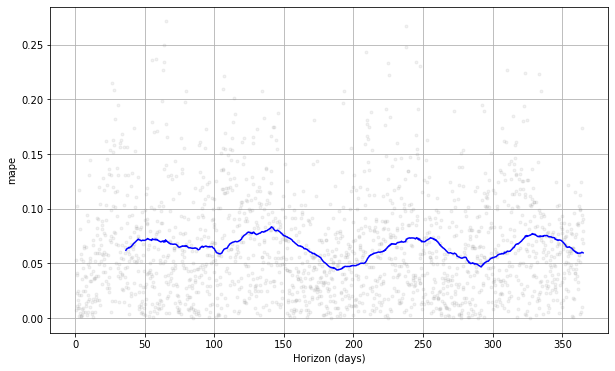

In [66]:
from prophet.plot import plot_cross_validation_metric

fig3 = plot_cross_validation_metric(cv_results,metric='mape')

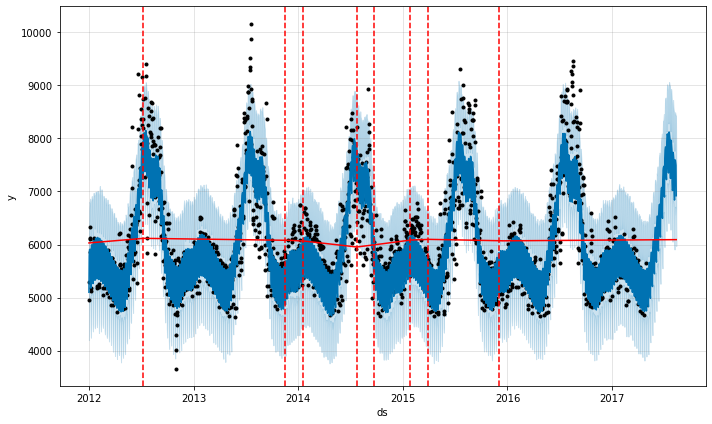

In [73]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),model,forecast)

In [74]:
deltas = model.params['delta'].mean(0)
deltas

array([ 1.10520e-07, -2.50886e-04, -1.01936e-01, -2.76920e-05,
        3.40496e-08, -1.96221e-08, -7.43167e-08, -3.63834e-08,
        8.22848e-08, -1.00126e-07, -3.21144e-02, -7.26889e-02,
       -4.25869e-06, -1.16177e-08,  2.44121e-01,  1.43109e-02,
       -6.65350e-08, -9.95382e-02, -6.23832e-02, -2.28995e-08,
        1.03571e-08,  2.19057e-09,  2.63178e-02,  2.29535e-03,
        3.97253e-07])

In [75]:
range(len(deltas))

range(0, 25)

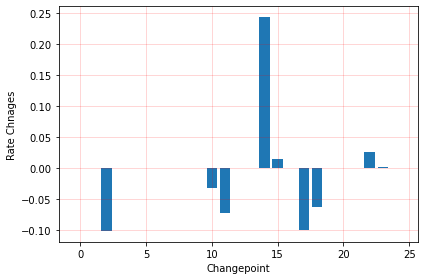

In [76]:
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)),deltas)
ax.grid(True,which='major',c='red',ls='-',alpha=0.2)
ax.set_ylabel('Rate Chnages')
ax.set_xlabel('Changepoint')
fig.tight_layout()
#Prophet plots around 25 chnage points

In [ ]:
model.changepoints

62     2012-03-03
124    2012-05-04
187    2012-07-06
249    2012-09-06
311    2012-11-07
373    2013-01-08
436    2013-03-12
498    2013-05-13
560    2013-07-14
622    2013-09-14
685    2013-11-16
747    2014-01-17
809    2014-03-20
871    2014-05-21
934    2014-07-23
996    2014-09-23
1058   2014-11-24
1120   2015-01-25
1183   2015-03-29
1245   2015-05-30
1307   2015-07-31
1369   2015-10-01
1432   2015-12-03
1494   2016-02-03
1556   2016-04-05
Name: ds, dtype: datetime64[ns]